READ SOCIAL_NETWORK_ADS FILE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

CREATE X , y and Split Dataset

In [ ]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
X['GenderNew']=l1.fit_transform(X['Gender'])
X=X.drop('Gender',axis=1)
X

,User ID,Age,EstimatedSalary,GenderNew
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training and Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


USE GRIDSEARCHCV TO FIND BEST K VALUE

In [ ]:
from inspect import Parameter
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':[i for i in range(1,25)]}
t=GridSearchCV(estimator=classifier,param_grid=param)
t.fit(X_train,y_train)
t.best_params_

{'n_neighbors': 5}

EVALUATING 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  6]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.82      0.88      0.85        32

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



Comparing Error Rate with the K Value

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

K VALUE PLOTING

Text(0, 0.5, 'Mean Error')

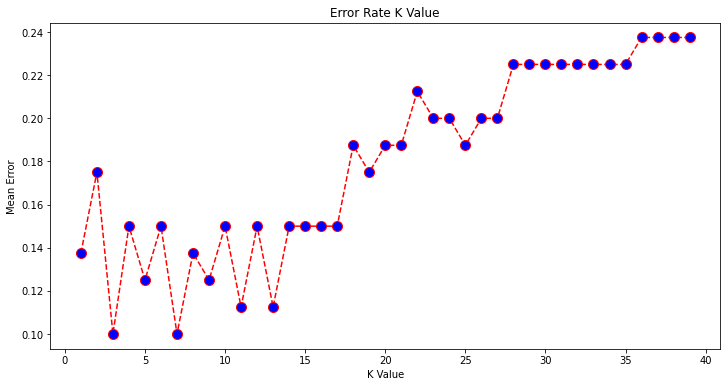

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
